In [1]:
# These are helpful routines that will assist in building this book.
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *

loadLatexPreamble()

$
\DeclareMathOperator{\Tr}{Tr}
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


In [2]:
# This is only here to create the navigation link:
genPrevLink()

# [Previous](<17-Open Orbit Propagation.ipynb>)

# Orbits in 3D

Recall that we have [previously asserted](<14-Keplers Laws Continued.ipynb#Keplerian-Orbit-Determination>) that *everything* about a two-body orbit can be encoded by a single, simultaneous measurement of the components of the orbital position and velocity.  This means that we are able to encode everything about the orbit using six scalar values (3 each for the position and velocity vectors), plus the time and gravitational parameter, which are assumed known.  On the other hand, as we've been going through our development of propagation approaches for the various conic sections, we've only been tracking three independent variables ($a, e, t_p$) along with a measure of the current time (provided by one of the anomaly angles) and the gravitational parameter. So, there appears to be a disconnect. 

It could be that the encoding provided by $\mf r, \mf v$ is overdetermined, and there are additional constraint equations that could be found between the elements of the two vectors.  Alternatively, it could be that we're missing something from our description of the conic section solutions. It turns out that the latter is true.  Notice that our entire discussion about vector components of the conic section solutions has been in the context of the perifocal frame.  What we're missing is the *orientation* of the perifocal frame within some arbitrary inertial frame.

<div class="alert alert-block alert-danger">
    Again, always remember that the perifocal frame <i> is</i> inertial.  It's just non-arbitrary.  What we're after here is a description of our orbit in components of some entirely arbitrary frame of reference with respect to which we make our measurements.
</div>

Fortunately, we have already provided ourselves with a generic method of encoding arbitrary orientation by way of [Euler Angles](<05-More Reference Frames.ipynb#Euler-Angles>), and we can use that formalism directly for this purpose. 

# Orientation of the Perifocal Frame

By convention, the perifocal frame of an orbit is a 3-1-3 body rotation from the inertial frame, using Euler angle set ($\Omega, I, \omega$).

<div class="alert alert-block alert-danger">
    Note that's this is all this is: a convention.  As we've previously established, any Euler angle set can be used to describe any orientation.  We use this particular set because essentially all of the astrodynamics literature uses it, and we'd all like to (more or less) speak the same language.
</div>

<p style="text-align:center;"><img src="img/orbit_euler_angles4.png" alt="Perifocal Frame Euler Angles" width="1000" id="fig:orbit_euler_angles"/></p>

We begin with inertial frame $\mc I = (\bhat{e}_1, \bhat{e}_2, \bhat{e}_3)$ with our orbit in the $\bhat{e}_1-\bhat{e}_2$ plane.  We rotate by angle $\Omega$, known as the **longitude of the ascending node** about $\bhat{e}_3$ to generate an intermediate frame $(\bhat{n}, \bhat{e}_3 \times \bhat{n} , \bhat{e}_3)$, where $\bhat{n}$ is called the **line of nodes**. We thus have that:
$$\cos(\Omega) = \bhat{n} \cdot \bhat{e}_1$$

We next rotate by angle $I$, called the **inclination** about $\bhat{n}$, generating intermediate frame $(\bhat{n}, \bhat{h} \times \bhat{n}, \bhat{h})$, where $\bhat{h}$ is the angular momentum direction of the final orbit (and thus perpendicular to the orbital plane. This tells us that:
$$\cos(I) = \bhat{h} \cdot \bhat{e}_3$$

Finally, we rotate by angle $\omega$, the **argument of periapsis**, about $\bhat{h}$, to generate our final perifocal frame $\mc P = (\bhat{e}, \bhat{q}, \bhat{h})$ where $\bhat{e}$ is the eccentricity vector direction.  Our final rotation angle is thus:
$$\cos(\omega) = \bhat{n} \cdot \bhat{e}$$

Let's make sure we're clear on the geometry of all this.  The line of nodes is the intersection of the orbital plane ($\bhat{e}-\bhat{q}$) with the **fundamental plane** ($\bhat{e}_1-\bhat{e}_2$) of the $\mc I$ frame. $\Omega$ is the angle to the ascending node because it points to the side of the line of nodes at which the orbit is ascending (moving in the positive $\bhat{e}_3$ direction with respect to the fundamental plane).  The inclination is the angle between these two planes (and thus also the angle between $\bhat{e}_3$ and the angular momentum direction of the orbit). The argument of periapsis simply rotates the orbit within its orbital plane and gives the offset between the line of nodes and the eccentricity vector direction (which points at periapsis, and hence the name).

Both $\Omega$ and $\omega$ are defined in the range of $[0, 2\pi)$, whereas $I$ is defined in the range of $[0,\pi]$ (inclinations $>\pi$ describe the same orbits as can be found by changing the longitude of the ascending node).  Orbits with inclinations below $90^\circ$ are known as **prograde** - the orbital motion is counter-clockwise about $\bhat{e}_3$ (looking down).  Since $\bhat{e}_3$ is typically defined such that the primary body's rotation is also counter-clockwise about it, prograde motion should be interpreted as orbital motion in the same direction as the rotation of the central body about its own axis. For a visual, think of Earth's north pole direction.  The Earth rotates due East about the north pole.  Taking this direction to be $\bhat{e}_3$, an inclination of 0 gives us an **equatorial** orbit (one along the equator).  Orbit's up to 90$^\circ$ inclination will progress in the same direction as the Earth's rotation.

Orbits near $90^\circ$ inclination are known as **polar** orbits, and orbits with inclination between $90^\circ$ and $180^\circ$ are **retrograde** (orbital motion opposite the rotation of the central body).

Let's apply our newfound Euler angle formalism to fully describe all of this mathematically. First, let's define the three separate DCMs related to our three simple rotations:

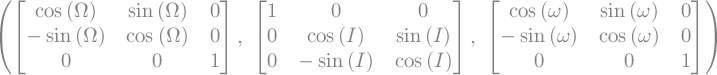

In [3]:
O, I, w = symbols("Omega, I, omega", real=True)
R1 = rotMat(3, O)
R2 = rotMat(1, I)
R3 = rotMat(3, w)
R1, R2, R3

The DCM relating $\mc I$ to $\mc P$ is the composition of these three matrices,a and is given by:

$\framerot{P}{I} = $

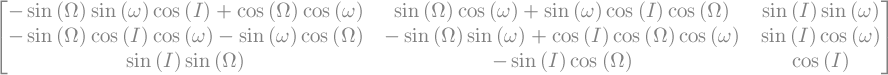

In [4]:
pCi = R3 * R2 * R1
pCi

We can now finally express the components of our orbital radius and velocity vectors in components of an arbitrary inertial frame as:
$$\left[\mf r \right]_\mc I = \framerot{I}{P}\left[\mf r \right]_\mc P \quad \textrm{and}\quad  \left[\mf v \right]_\mc I = \framerot{I}{P}\left[\mf v \right]_\mc P$$

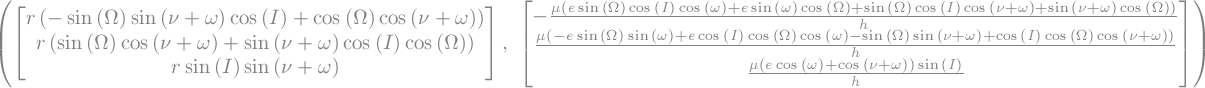

In [5]:
r, nu, mu, h, e = symbols("r,nu,mu,h,e", real=True)
iCp = pCi.transpose()
r_I = simplify(iCp * Matrix([r * cos(nu), r * sin(nu), 0]))
v_I = simplify(iCp * mu / h * Matrix([-sin(nu), e + cos(nu), 0]))
r_I, v_I

Cleaning this up a bit, we have:

$$ \left[\mf r\right]_\mc I = r\left[\begin{matrix} 
\cos{\left (\Omega \right )} \cos{\left (\nu + \omega \right )}- \sin{\left (\Omega \right )} \sin{\left (\nu + \omega \right )} \cos{\left (I \right )}  \\
 \sin{\left (\Omega \right )} \cos{\left (\nu + \omega \right )} + \sin{\left (\nu + \omega \right )} \cos{\left (I \right )} \cos{\left (\Omega \right )}\\
 \sin{\left (I \right )} \sin{\left (\nu + \omega \right )}\end{matrix}\right]_\mc I$$
 and
$$ \left[\mf v\right]_\mc I = \frac{\mu}{h}\left[\begin{matrix}- e \sin{\left(\Omega \right)} \cos{\left(I \right)} \cos{\left(\omega \right)} - e \sin{\left(\omega \right)} \cos{\left(\Omega \right)} - \sin{\left(\Omega \right)} \cos{\left(I \right)} \cos{\left(\nu + \omega \right)} - \sin{\left(\nu + \omega \right)} \cos{\left(\Omega \right)}\\- e \sin{\left(\Omega \right)} \sin{\left(\omega \right)} + e \cos{\left(I \right)} \cos{\left(\Omega \right)} \cos{\left(\omega \right)} - \sin{\left(\Omega \right)} \sin{\left(\nu + \omega \right)} + \cos{\left(I \right)} \cos{\left(\Omega \right)} \cos{\left(\nu + \omega \right)}\\\left(e \cos{\left(\omega \right)} + \cos{\left(\nu + \omega \right)}\right) \sin{\left(I \right)}\end{matrix}\right]_\mc I $$

<div class="alert alert-block alert-danger">
    As we never get tired of saying, the perifocal frame is an inertial frame.  The conversion of the components of velocity requires <i>only</i> applying the proper DCM.  There is no angular velocity between the periofocal frame and the initial inertial frame, and so the transport equation does not apply (or equivalently has no effect if applied).
</div>

## Special Cases

There are three special cases that must be considered with the use of this Euler angle set. 

1. First, there's the case of $I = 0$, which leads to a repeated rotation about $\bhat{e}_3$ of a total angle $\omega+\Omega$. In this case, there is not distinction between these two angles (the orbital plane lies in the fundamental plane and so there is no well-defined line of nodes).  We therefore define the **longitude of periapsis** (sometimes called the **longitude of pericenter**) as $\varpi = \omega+ \Omega$.

<div class="alert alert-block alert-danger">
    $\varpi$ is a variant of the greek letter $\pi$, and is literally called 'variant pi' or 'varpi'. The longitude of periapsis is therefore sometimes defined as $\pi$, but this can easily lead to much confusion with the constant of the same name (you may have heard of it).
</div>

<div class="alert alert-block alert-danger">
    $\varpi$ is frequently used even in cases where $I$ is not zero (we'll see this in a bit).  It is important to remember that in these cases, we are summing angles measured in two different planes, so that the resulting value is not a simple planar angle, but rather a compound angle in two planes. Amusingly, this type of angle is sometimes known as a dogleg angle.
</div>

2. The second special case to consider is the circular orbit, where $e = 0$, meaning that there is no well-defined eccentricity vector direction.  In these cases, we can simply measure the total angle between the line of nodes and the orbital radius vector, and thus define the  **argument of lattitude**: $\theta \triangleq \nu + \omega$.

<div class="alert alert-block alert-danger">
    Unlike $\varpi$, $\theta$ is always the sum of two angles measured in the same plane (the orbital plane) and so is always a well-defined planar angle.
</div>

3. Finally, we can combine the two cases, in which case we have an equatorial, circular orbit.  For this, we add all three angles to generate the **true longitude** $l \triangleq \varpi + \nu \equiv \Omega + \omega +\nu$.  In the case of an equatorial orbit, the true longitude represents the angle between $\bhat{e}_1$ and the orbital radius vector.  In all other cases, it is a compound angle summed over two different planes.

# Conversion Between Orbital Elements and Orbital State Vectors

We have now filled in the apparent gap of 3 scalars in our orbital element (sometimes known as **Keplerian** elements) description and shown that a full orbital definition must include at least six scalar values (along with the gravitational parameter of the system and time).  This means that we should now be able to convert between orbital element sets and the orbital radius and velocity vectors (collectively known as the **orbital state vectors**).  We have essentially already completed the conversion from Keplerian elements to the state vectors, but let's write it out fully in one place.

## Keplerian Elements to Orbital State Vectors

Given $\mu, a, e, t_p, \Omega, I, \omega$, we wish to find $\mf r, \mf v$ at time $t$. If $e \ne 1$:
1. Find the mean motion and angular momentum magnitude as:
$$n = \sqrt{\frac{\mu}{\vert a\vert^3}} \quad \textrm{and} \quad h = \sqrt{\mu a(1-e^2)}$$
2. Solve for the mean anomaly as $M = n(t-t_p)$ and convert to eccentric/hyperbolic anomaly via Newton-Raphson.
3. Convert the eccentric/hyperbolic anomaly to true anomaly and calculate orbital radius magnitude.
4. Solve for $\framerot{I}{P}$ by multiplying out the 3 DCMs associated with $\Omega, I, \omega$.
5. Solve for the components of $\mf r(t)$ and $\mf v(t)$ as:
$$r\framerot{I}{P}\begin{bmatrix}\cos(\nu) \\ \sin(\nu) \\ 0\end{bmatrix}_\mc P \quad \textrm{and}\quad  \frac{\mu}{h}\framerot{I}{P}\begin{bmatrix}-\sin(\nu) \\ e + \cos(\nu) \\  0\end{bmatrix}_\mc P$$

For parbolae, the procedure is almost identical, save that we need $\ell$ rather than $a,e$ as an input, we form the mean motion as $2 \sqrt{\frac{\mu}{\ell^3}}$, and we can solve for the parabolic anomaly analytically rather than via numerical iteration.

As an alternative, we can write specific forms for the state vectors for open and closed orbits as functions of the eccentric and hyperbolic anomalies.  For the elliptical case, we have:
$$\left[\mf r\right]_\mc I = a\framerot{I}{P}\begin{bmatrix}\cos(E)-e \\ \sqrt{1-e^2}\sin(E) \\ 0\end{bmatrix}_\mc P$$
and
$$\left[\mf v\right]_\mc I = \frac{a^2n}{r}\framerot{I}{P}\begin{bmatrix}-sin(E) \\ \sqrt{1-e^2}\cos(E) \\ 0\end{bmatrix}_\mc P$$

An interesting thing happens if we multiply these terms out (recalling that we [previously found](<5-Keplers Time Equation.ipynb#Kepler's-Time-Equation>) that $r = a(1-e\cos(E))$:

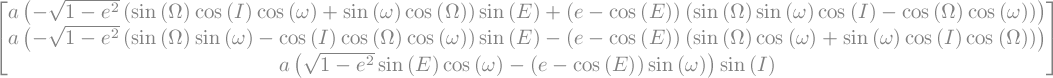

In [6]:
a, E, mu, n = symbols("a,E,mu,n", real=True)
rexp = a * (1 - e * cos(E))
rvecE = simplify(a * iCp * Matrix([cos(E) - e, sqrt(1 - e**2) * sin(E), 0]))
vvecE = simplify(
    a**2 * n / rexp * iCp * Matrix([-sin(E), sqrt(1 - e**2) * cos(E), 0])
)
rvecE

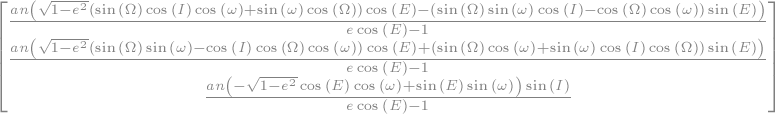

In [7]:
vvecE

If we stare at these two matrices long enough, we'll see that they both contain two common sets of terms with different multiples.  Collecting the common terms, we define:
$$A = a\begin{bmatrix}
\cos\Omega\cos\omega - \sin\Omega\sin\omega\cos I \\
\sin\Omega\cos\omega + \cos\Omega\sin\omega\cos I \\
\sin\omega\sin I 
\end{bmatrix} \quad\textrm{and}\quad
B = a\sqrt{1 - e^2} \begin{bmatrix}
-\cos\Omega\sin\omega - \sin\Omega\cos\omega\cos I \\
-\sin\Omega\sin\omega + \cos\Omega\cos\omega\cos I \\
\cos\omega\sin I
\end{bmatrix}$$
which allows us to write:
$$\begin{split}\left[\mf r\right]_\mc I &= A(\cos E - e) + B \sin E\\
\left[\mf v\right]_\mc I &= \left(\frac{n}{1 - e\cos E}\right)\left[-A \sin E + B \cos E\right] \end{split}$$

If dealing strictly with closed orbits, the utility of this form is that it eliminates the need to convert eccentric anomalies to true anomalies. 

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Find an equivalent form for the orbital state vectors of hyperbolic orbits as functions of hyperbolic anomalies.
</div>

## Orbital State Vectors to Keplerian Elements

Now for the fun part:  Given $\mu, t, \mf r(t), \mf v(t)$, find $a,e,t_p, \Omega,I, \omega$.
1. Calculate the specific orbital energy as:
$$ \mc E = \frac{\mf v \cdot \mf v}{2} - \frac{\mu}{\Vert \mf r \Vert}$$
and solve for the semi-major axis as 
$$a = -\frac{\mu}{2\mc E}$$
2. Find the angular momentum vector and line of nodes direction as:
$$ \mf h = \mf r \times \mf v \quad \textrm{and} \quad \bhat{n} = \bhat{e}_3 \times\bhat{h}$$
Remember that $[\bhat{e}_3]_\mc I = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}_\mc I^T$.  
3. Solve for the eccentricity vector as:
$$\mf e = \frac{\mf v \times \mf h}{\mu} - \mf{\hat{r}} $$
The magnitude of $\mf e$ is the eccentricity, $e$. If $e$ is 1, set $\ell = \dfrac{\mf h \cdot \mf h}{\mu}$.
4. The inclination is given by:
$$I = \cos^{-1}{\left(\bhat{h}\cdot\bhat{e}_3\right)}$$
Since $I$ is only defined in $[0,\pi]$, the arccosine expression naturally maps to the correct range.
5. The cosine of the argument of periapsis is 
$$\cos(\omega) = \bhat{e} \cdot \bhat{n}$$
however this angle has a range of $[0,2\pi)$ and so the arccosine is insufficient.  Instead, we need to use a two-argument arctangent method, meaning that we also need an independent expression for $\sin(\omega)$.  We can get one by noting that both $\bhat{n}$ and $\bhat{e}$ are orthogonal to $\bhat{h}$, meaning that:
$$\sin(\omega) = \left(\bhat{n} \times \bhat{e}\right) \cdot \bhat{h}$$
Jointly, these give us $\omega$ as:
$$\omega=\tan^{-1}{\frac{\sin{(\omega)}}{\cos{(\omega)}}}$$
but only with a two-argument arctangent calculation. If $I = 0$, this calculation will result in an undefined value (NaN), in which case it can be replaced with $\varpi$, which will equal:
$$\varpi=\tan^{-1}{\frac{\bhat{e}\cdot \bhat{e}_2}{\bhat{e}\cdot \bhat{e}_1}} $$
6. Since $\Omega$ is the angle between $\bhat{n}$ and $\bhat{e}_1$, and $\bhat{n}$ lies entirely in the $\bhat{e}_1-\bhat{e}_2$ plane, we can compute the longitude of the ascending node as:
$$\Omega=\tan^{-1}{\frac{\bhat{n}\cdot \bhat{e}_2}{\bhat{n}\cdot \bhat{e}_1}} $$
again using a two-argument arctangent.
7. $\nu$ is the angle between $\mf r$ and $\mf e$, both of which are orthogonal to $\mf h$. We can therefore use the exact same strategy as we did with $\omega$:
$$\begin{split}\cos{(\nu)} &= \left(\mf{\hat{e}}\cdot\mf{\hat{r}}\right)\\
\sin{(\nu)} &= \left(\mf{\hat{e}}\times\mf{\hat{r}}\right)\cdot\mf{\hat{h}} \end{split}$$
and
$$\nu=\tan^{-1}{\frac{\sin{(\nu)}}{\cos{(\nu)}}}$$

<div class="alert alert-block alert-danger">
    Remember <a href="04-Simple%20Rotations.ipynb#Inverting-the-Rodrigues-Equation">hating and fearing</a> everything about trigonometric identities and expressions?  Arctangent is one of the worst.  Arctangent should be able to give you angle information from all four quadrants, but the typical implementation of an arctangent function wil have a range of only $(-\frac{\pi}{2}, \frac{\pi}{2})$.  However, essentially all math packages will provide a two-argument arctangent function (typically called something like atan2), whith the proper range of $(-\pi, \pi)$.
</div>


For the final step of finding the time of periapse passage, we will need slightly different expressions for the different conics:

### Time of Periapse Passage for Closed Orbits
Evaluate the eccentric anomaly as:
$$E = 2\tan^{-1}\left( \sqrt{\frac{1-e}{1+e}}\tan\left(\frac{\nu}{2}\right)\right)$$
and the time of periapse passage as:
$$t_p = t -\frac{E-e\sin{E}}{\sqrt{\dfrac{\mu}{a^{3}}}} $$
For closed orbits, we can also take an additional step of ensuring that the periapsis time is strictly positive (that is, finding the *next* periapsis passage).  To do so, we compute the orbital period:
$$T_p = 2\pi \sqrt{\frac{a^3}{\mu}}$$
If the evaluated $t_p$ is negative, we redefine it as:
$$t_p = kT_p + t_p$$
where $k$ is the smallest integer such that the expression evaluates to a positive value. 

### Time of Periapse Passage for Parabolic Orbits
Evaluate the parabolic anomaly and $t_p$ as:
$$\begin{split}
B &= \tan\left(\frac{\nu}{2}\right) \\
 t_p &= t -\frac{1}{2}\sqrt{\frac{\ell^3}{\mu}}\left(B + \frac{B^3}{3}\right) \,,
\end{split}
$$

### Time of Periapse Passage for Hyperbolic Orbits
This one is almost identical to the elliptical case:
$$ \begin{split} H &= 2\tanh^{-1}\left( \sqrt{\frac{e-1}{e+1}}\tan\left(\frac{\nu}{2}\right)\right) \\
t_p &= t -\frac{e\sinh{H} - H}{\sqrt{-\dfrac{\mu}{a^{3}}}}\end{split}$$


# Putting it all Together
<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Implement methods for converting between Keplerian elements and orbital state vectors. Test them out by ensuring that sending the output of one in as the input of the other returns your original input values.
</div>

In [8]:
def kepler2orbstate(mu, a, e, O, I, w, tp, t):
    """Calculate orbital state vectors from Keplerian elements

    Args:
        mu (float):
            Gravitational parameter
        a (float):
            Semi-major axis (or semi-parameter is e = 1)
        e (float):
            eccentricity
        O (float):
            longitude of ascending node (rad)
        I (float):
            inclination (rad)
        w (float):
            arguments of periapsis (rad)
        tp (float):
            time of periapsis passage
        t (float):
            current time

    Returns:
        tuple:
            r (numpy.ndarray):
                Components of orbital radius
            v (numpy.ndarray):
                Components of orbital velocity
    """

    return r, v

In [9]:
def orbstate2kepler(mu, r, v, t):
    """Calculate  Keplerian elements given orbital state vectors

    Args:
        mu (float):
            Gravitational parameter
        r (numpy.ndarray):
            Components of orbital radius
        v (numpy.ndarray):
            Components of orbital velocity
        t (float):
            current time

    Returns:
        tuple:
            a (float):
                Semi-major axis (or semi-parameter is e = 1)
            e (float):
                eccentricity
            O (float):
                longitude of ascending node (rad)
            I (float):
                inclination (rad)
            w (float):
                arguments of periapsis (rad)
            tp (float):
                time of periapsis passage
    """

    return a, e, O, I, w, tp

In [10]:
# verify your methods

As usual, we also have a reference implementation of these methods built into the book for future use.  The two built-in methods have the same names as the ones you implemented above (`kepler2orbstate` and `orbstate2kepler`) but slightly different calling syntax and inputs.  You are encouraged to explore these more fully before proceeding as they'll prove highly useful in the future.  For now, let's just demonstrate that we can generate 3D orbits of all types:

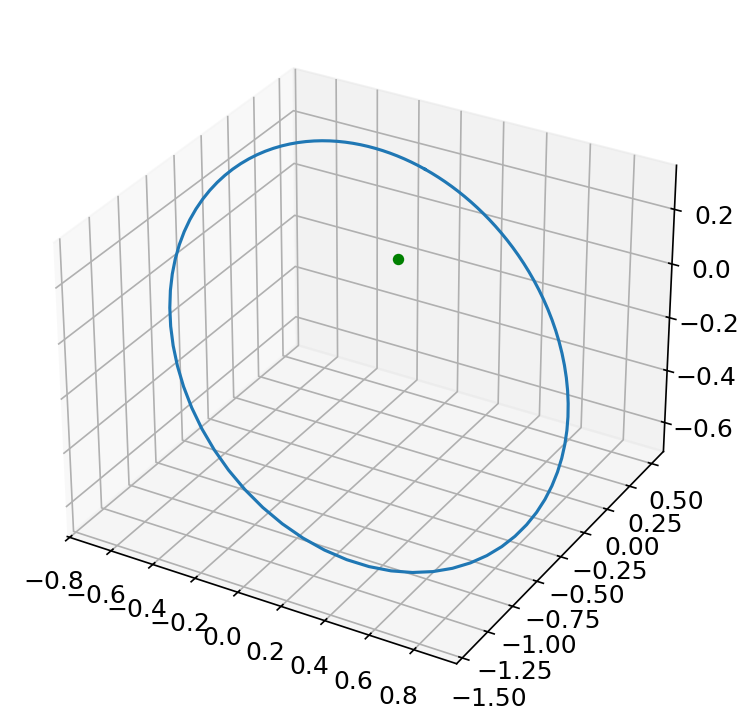

In [11]:
# grab the book's orbit state vector methods
from keplertools.fun import kepler2orbstate, orbstate2kepler

# generate an elliptical orbit in 3D
# sma = 1, e = 0.5, \Omega = 60 deg, I = 30 deg, \omega = 45 deg, mu = 1, nu \in (0,2\pi)
r, v = kepler2orbstate(
    1, 0.5, np.pi / 3, np.pi / 6, np.pi / 4, 1, np.linspace(0, 2 * np.pi, 100)
)

%matplotlib inline
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 12
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")
ax.plot(r[:, 0], r[:, 1], r[:, 2])
ax.scatter(0, 0, 0, color="g");

In [12]:
# show that we can retrieve the orbital element inputs from any of the outputs
a, e, O, I, w, tp = orbstate2kepler(r[33], v[33], 1)
a, e, O * 180 / np.pi, I * 180 / np.pi, w * 180 / np.pi

(array([1.]), array([0.5]), array([60.]), array([30.]), array([45.]))

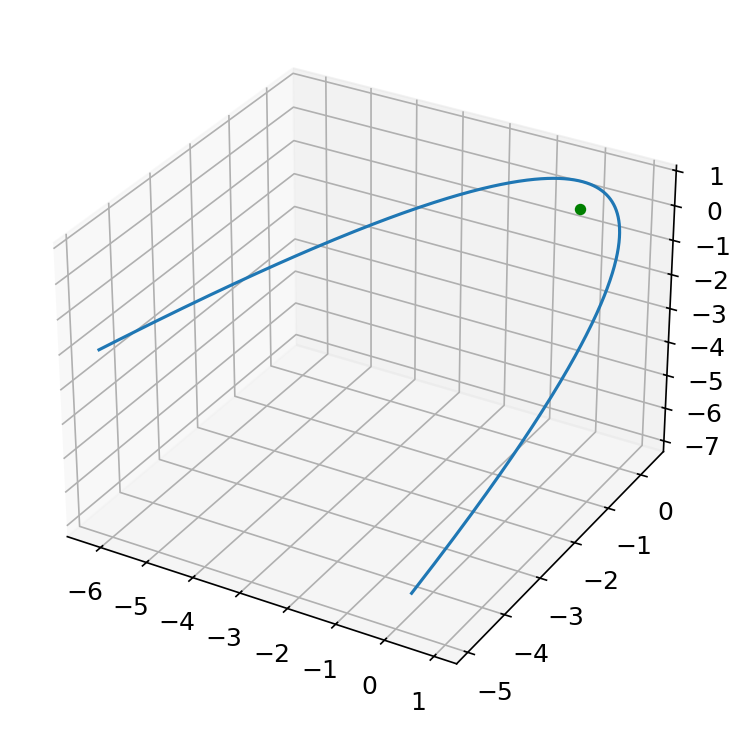

In [13]:
# parabola
# semi-parameter 1, \Omega = 30 deg, I = 60 deg, \omega = 45 deg, mu = 1
r, v = kepler2orbstate(
    1,
    1,
    np.pi / 6,
    np.pi / 3,
    np.pi / 4,
    1,
    np.linspace(-np.pi + 0.5, np.pi - 0.5, 500),
)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")
ax.plot(r[:, 0], r[:, 1], r[:, 2])
ax.scatter(0, 0, 0, color="g");

In [14]:
# show that we can retrieve the orbital element inputs from any of the outputs
l, e, O, I, w, tp = orbstate2kepler(r[42], v[42], 1)
l, e, O * 180 / np.pi, I * 180 / np.pi, w * 180 / np.pi  # first output is \ell for parabolae

(array([1.]), array([1.]), array([30.]), array([60.]), array([45.]))

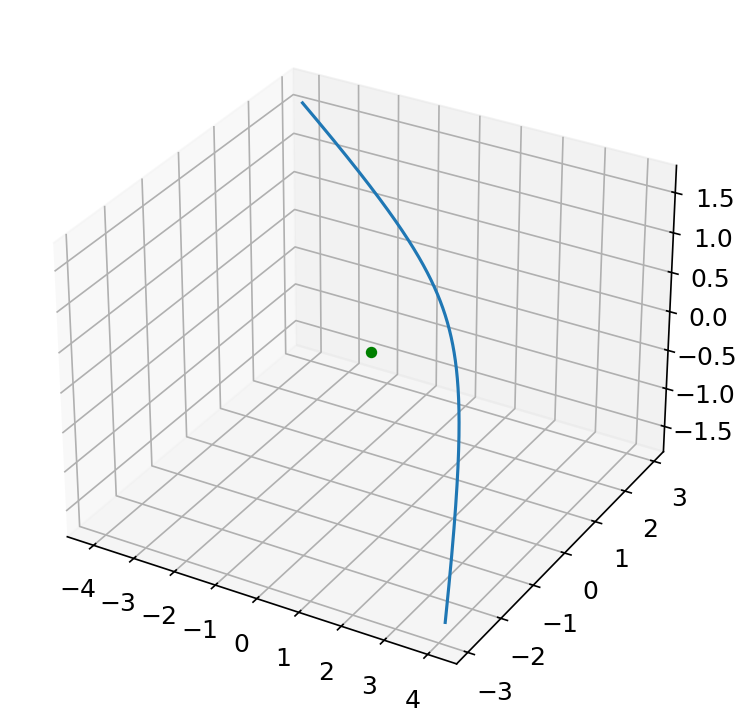

In [15]:
# hyperbola
# a = -1, e = 2.5, \Omega = 45 deg, I = 18 deg, \omega = 9 deg, mu = 1
r, v = kepler2orbstate(
    -1,
    2.5,
    np.pi / 4,
    np.pi / 10,
    np.pi / 20,
    1,
    np.linspace(-np.pi / 2, np.pi / 2, 500),
)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")
ax.plot(r[:, 0], r[:, 1], r[:, 2])
ax.scatter(0, 0, 0, color="g");

In [16]:
# show that we can retrieve the orbital element inputs from any of the outputs
a, e, O, I, w, tp = orbstate2kepler(r[15], v[15], 1)
a, e, O * 180 / np.pi, I * 180 / np.pi, w * 180 / np.pi

(array([-1.]), array([2.5]), array([45.]), array([18.]), array([9.]))

In [17]:
# This is just here to generate the link to the next notebook
genNextLink()

# [Next](<19-f and g Functions.ipynb>)